In [173]:
# imports and function definitions
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import signal

# fnc: loads data generated from AD2 .csv file and stores the time, channel 1 and channel 2 readings 
def loadData(file):
    data = np.genfromtxt(file, skip_header = 12, dtype=None, delimiter = ",")
    time = data[:,0]
    ch1 = data[:,1]
    ch2 = data[:,2]
    return time, ch1, ch2

# fnc: performs correlation of a sample function and reference function
def correlate(raw, ref):
    output = np.zeros(raw.size + ref.size)
    i = -1
    for raw_val in raw:
        i += 1
        j = -1
        for ref_val in ref:
            j += 1
            output[i+j] += raw_val*ref_val
    return output

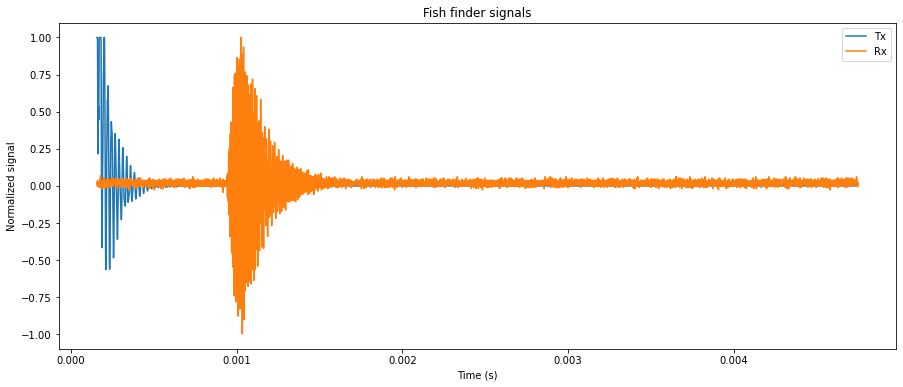

In [182]:
# loading data & plotting
[time, tx, rx] = loadData("1.5m_1.csv") 
plt.plot(time[900:], tx[900:]/max(tx[900:])) # btw i think there were some issues with saving the actual 200 kHz  
                                             # pulse part, so the ringing down of Tx was saved
plt.plot(time[900:], rx[900:]/max(rx[900:]))
plt.xlabel("Time (s)")
plt.ylabel("Normalized signal")
plt.title("Fish finder signals")
plt.legend(["Tx", "Rx"])
fig = plt.gcf()
fig.set_size_inches(15, 6)

In [189]:
# Generating sample data (200kHz square wave)
frequency = 200*1000 
sample = signal.square(2 * np.pi * frequency * time, duty = 0.5)

# Performing cross correlation (200 kHz sample)
correlation_tx = correlate(tx/max(tx), sample)
correlation_rx = correlate(rx/max(rx), sample)

# Generating sample data (2kHz square wave)
frequency = 2*1000 
sample = signal.square(2 * np.pi * frequency * time, duty = 0.5)
correlation_rx_2kHz = correlate(rx/max(rx), sample)

Text(0.5, 1.0, 'Tx Correlation with 200kHz, 50% duty cycle, square wave')

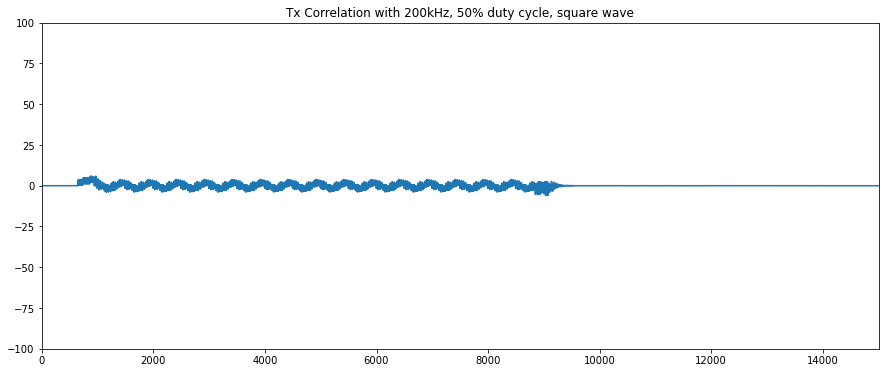

In [205]:
plt.plot(np.arange(correlation_tx.size), correlation_tx)
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.ylim([-100, 100])
plt.xlim([0, 15000])
plt.title("Tx Correlation with 200kHz, 50% duty cycle, square wave") 

Text(0.5, 1.0, 'Rx Correlation with 200kHz, 50% duty cycle, square wave')

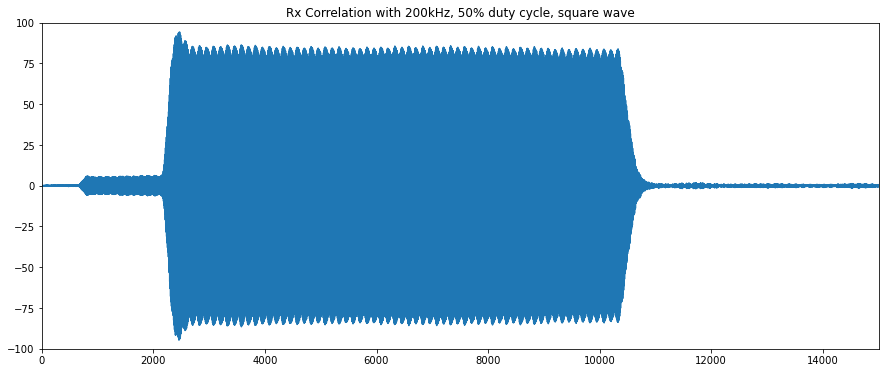

In [204]:
# Performing cross correlation (200 kHz sample)
plt.plot(np.arange(correlation_rx.size), correlation_rx)
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.ylim([-100, 100])
plt.xlim([0, 15000])
plt.title("Rx Correlation with 200kHz, 50% duty cycle, square wave")

Text(0.5, 1.0, 'Rx Correlation with 2kHz, 50% duty cycle, square wave')

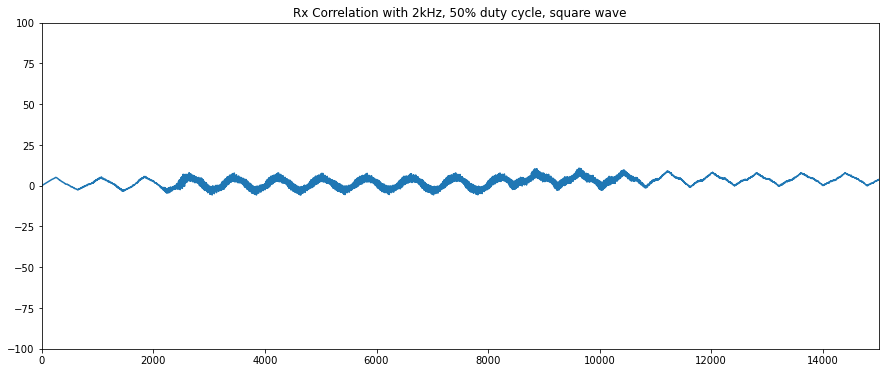

In [203]:
# Performing cross correlation (2 kHz sample)
plt.plot(np.arange(correlation_rx_2kHz.size), correlation_rx_2kHz)
fig = plt.gcf()
fig.set_size_inches(15, 6)
plt.ylim([-100, 100])
plt.xlim([0, 15000])
plt.title("Rx Correlation with 2kHz, 50% duty cycle, square wave")

In [152]:
# Fourier Transforms
from scipy.fft import fft, fftfreq

def fourier_analysis(time, signal, title):
    samples = len(time)
    sampling_period = (time[-1] - time[0])/samples 

    yf = fft(signal)
    xf = fftfreq(samples, sampling_period)[:samples//2]
    plt.plot(xf/1000,2.0/samples * np.abs(yf[0:samples//2]), linestyle='-', marker='o', markersize=4, markerfacecolor='r')
    
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Power (dB)")
    plt.title(title)

Text(0.5, 1.0, 'Rx envelope')

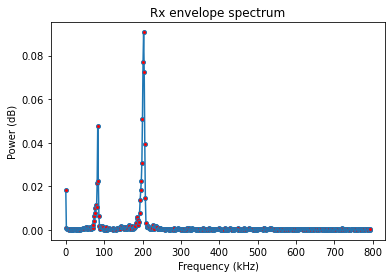

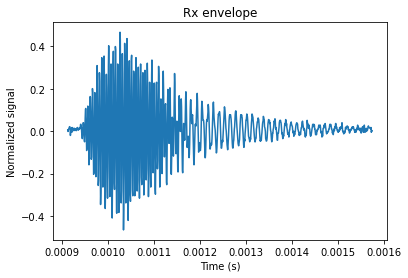

In [186]:
fourier_analysis(time[2100:3150],rx[2100:3150], "Rx envelope spectrum") # Dominant frequency at 200 kHz slay
plt.figure(2)
plt.plot(time[2100:3150],rx[2100:3150])
plt.xlabel("Time (s)")
plt.ylabel("Normalized signal")
plt.title("Rx envelope")

Text(0.5, 1.0, 'Rx')

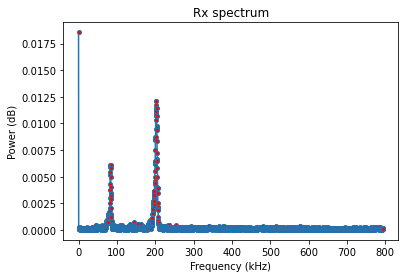

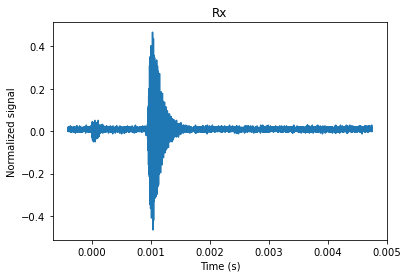

In [188]:
fourier_analysis(time,rx, "Rx spectrum") # Dominant frequency at 200 kHz slay 
                                         # (disregard 0Hz peak since this was looking at entire Rx signal)
plt.figure(2)
plt.plot(time,rx)
plt.xlabel("Time (s)")
plt.ylabel("Normalized signal")
plt.title("Rx")